# Analysis of custom filters

## Aim of this notebook

Analyzing the pre-filtered fragment library, the reduced fragment library, retrieved by a random subset and the custom filtered fragment library.

## Table of contents
1. Load the fragment libraries

    1.1. Load fragment library pre-filtered
    
    1.2. Load fragment library reduced
    
    1.3. Load fragment library custom filtered
    
    1.4. Check which fragments from are contained in the subsets
    

2. t-SNE plots
    
    2.1. Comparing fragment library sets
    * Fragment library pre-filtered vs. fragment library reduced
    * Fragment library pre-filtered vs. fragment library custom filtered
    * Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
    2.2. Comparing single custom filtering steps



3. Most common fragments

    3.1. Fragment library pre-filtered
    
    3.2. Fragment library reduced
    
    3.3. Fragment library custom filtered
    
 
4. Connection frequecy between subpockets

    4.1. Fragment library pre-filtered
    
    4.2. Fragment library reduced
    
    4.3. Fragment library custom filtered
    

5. Fragment similarity per subpocket


6. Fragment properties
    
    6.1. per subpocket for each set
    
    6.2. per custom filter


7. Development of number of fragments per subpocket during custom filtering

## Imports and preprocessing

In [1]:
from collections import Counter
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import filters, utils

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

### Define global paths

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"

## 1. Load the fragment libraries
*  1.1. Load fragment library pre-filtered
*  1.2. Load fragment library reduced
*  1.3. Load fragment library custom filtered
*  1.4. Check which fragments from are contained in the subsets

### 1.1. Load fragment library pre-filtered

In [5]:
fragment_library = utils.read_fragment_library(PATH_DATA / "fragment_library_filtered")
fragment_library.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,*Nc1c[nH]c2ncc(*)cc12,AP
1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,*N/C(=C1\C(=O)Nc2cc(*)ccc21)c1ccccc1,AP
2,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,Cc1cc(N)[nH]n1,*Nc1cc(C)n[nH]1,AP

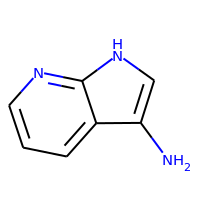
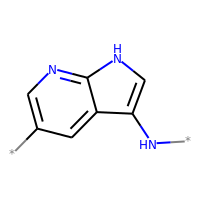
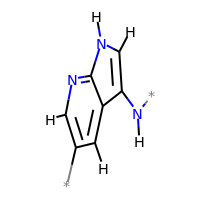
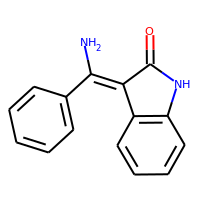
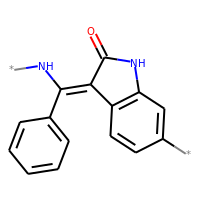
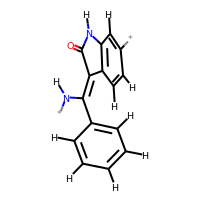
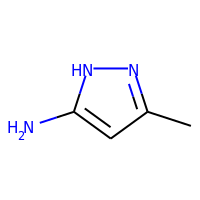
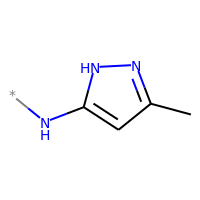
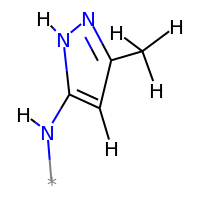

In [6]:
fragment_library['AP'].head(3)

### 1.2. Load fragment library reduced

ToDo: Explain how it was reduced

In [7]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP

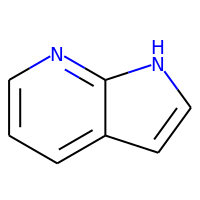
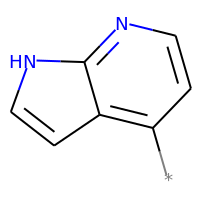
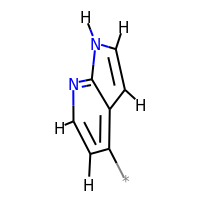
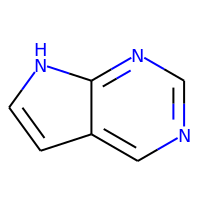
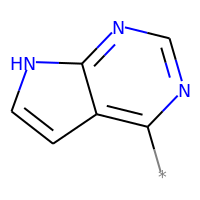
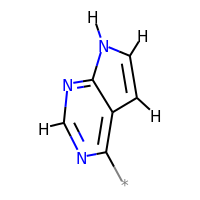
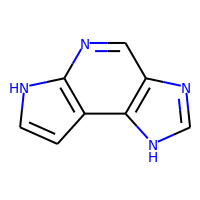
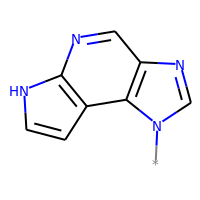
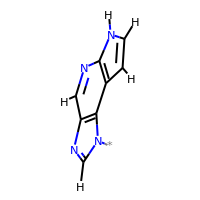

In [8]:
fragment_library_reduced['AP'].head(3)

### [ToDo]:
### 1.3. Load fragment library custom filtered

In [9]:
#fragment_library_custom = utils.read_fragment_library(PATH_DATA / "fragment_library_custom")

### 1.4. Check which fragments from are contained in the subsets

In [10]:
def frag_in_subset(fragment_library_original, fragment_library_subset, colname):
    fragment_library_concat = pd.concat(fragment_library_original).reset_index(drop=True)
    fragment_library_reduced_concat = pd.concat(fragment_library_subset).reset_index(drop=True)
    bool_reduced = []
    for i, row in fragment_library_concat.iterrows():
        notfound = True
        for j, reduced_row in fragment_library_reduced_concat.iterrows():
            if row['smiles'] == reduced_row['smiles']:
                bool_reduced.append(1)
                notfound = False
                break
        if notfound:
            bool_reduced.append(0)
    fragment_library_concat[colname] = bool_reduced
    fraglib = filters.prefilters._make_df_dict(fragment_library_concat)
    return(fraglib)

In [11]:
fragment_library = frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

## 2. t-SNE plots
* 2.1. Comparing fragment library sets
        - Fragment library pre-filtered vs. fragment library reduced
        - Fragment library pre-filtered vs. fragment library custom filtered
        - Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
* 2.2. Comparing single custom filtering steps

- what are t-SNE plots
- what can we see

In [12]:
# function to create t-SNE plots, will be moved to .py file when finished
# ToDo: when custom filtered finished: make function to create several t-SNE plots at once

In [13]:
import seaborn as sns
from rdkit.Chem import MACCSkeys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def create_tsne_plots(fragment_library, colname):
    fragment_library_concat = pd.concat(fragment_library).reset_index(drop=True)
    fragment_library_concat["maccs"] = fragment_library_concat.ROMol.apply(MACCSkeys.GenMACCSKeys)
    
    pca = PCA(n_components=50)
    crds = pca.fit_transform(list(fragment_library_concat["maccs"]))
    
    crds_embedded = TSNE(n_components=2).fit_transform(crds)
    
    tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
    tsne_df['reduced'] = fragment_library_concat[colname] #add bool column from filtering steps here
    
    ax = sns.scatterplot(data=tsne_df.query("reduced == 1"),x="X",y="Y",color='lightgreen')
    ax = sns.scatterplot(data=tsne_df.query("reduced == 0"),x="X",y="Y",color='lightcoral')

### 2.1. Comparing fragment library sets

#### prefiltered vs. reduced

/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


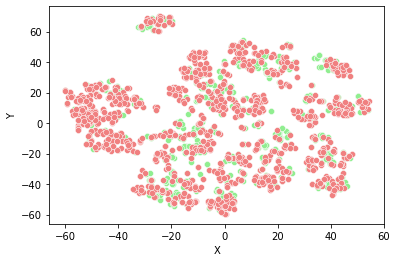

In [14]:
create_tsne_plots(fragment_library, colname="bool_reduced")

#### prefiltered vs. custom

#### prefiltered vs. reduced vs. custom

### 2.2 Comparing single custom filtering steps

## 3. Most common fragments per subpocket
* 3.1. Fragment library pre-filtered
* 3.2. Fragment library reduced
* 3.3. Fragment library custom filtered

In [15]:
# complete library??

In [16]:
subpocket = "all"
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library, subpocket)

Number of molecules: 81
Threshold:  0.6
Number of clusters:  36
# Clusters with only 1 molecule:  20
# Clusters with more than 5 molecules:  4
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


### 3.1. Fragment library pre-filtered

In [17]:
subpocket = 'AP'
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library, subpocket)

Number of molecules: 496
Threshold:  0.6
Number of clusters:  123
# Clusters with only 1 molecule:  65
# Clusters with more than 5 molecules:  20
# Clusters with more than 25 molecules:  1
# Clusters with more than 100 molecules:  0


,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id
0,17,Clc1cnc2[nH]cnc2c1,1,,1,2
1,19,COc1ccc2cccnc2c1,1,,1,3
2,20,c1cnc2nc[nH]c2c1,1,,1,4
3,34,O=c1[nH]ccc2cncnc12,1,,1,5
4,36,Clc1cnc2[nH]ccc2c1,1,,1,6

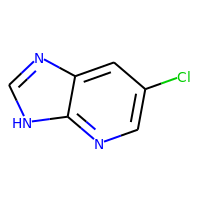
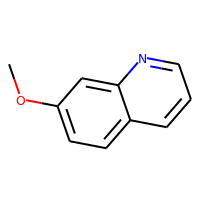
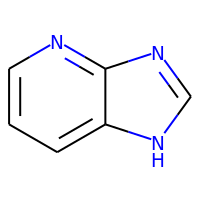
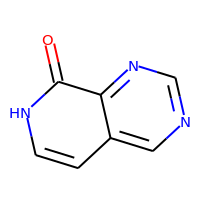
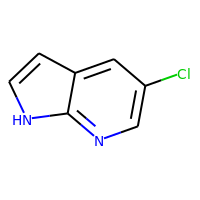

In [18]:
most_common_fragments.head()

Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


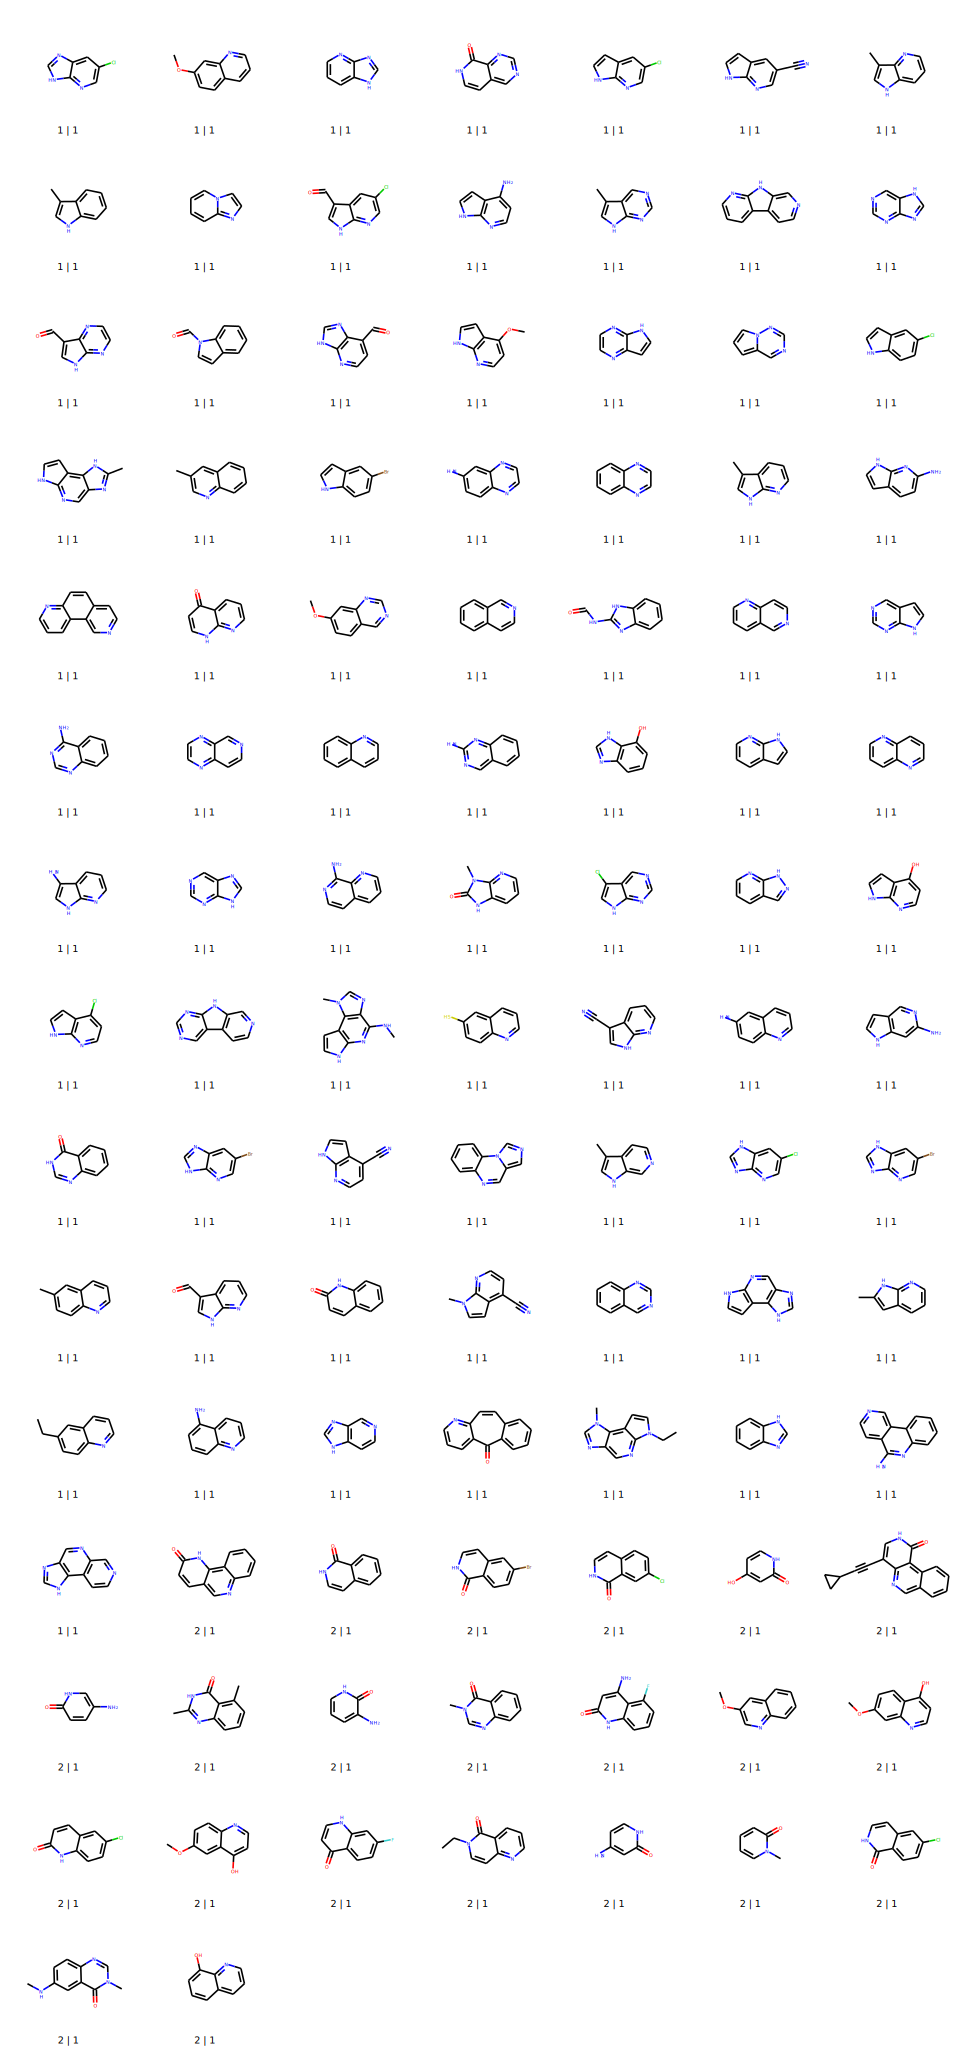

In [19]:
filters.pipeline_analysis.draw_clusters(most_common_fragments, subpocket, None)

### 3.2. Fragment library reduced

In [20]:
most_common_fragments_reduced = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_reduced, subpocket)

Number of molecules: 145
Threshold:  0.6
Number of clusters:  101
# Clusters with only 1 molecule:  85
# Clusters with more than 5 molecules:  2
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id
0,20,O=[N+]([O-])c1cccc2ncccc12,1,,1,2
1,27,Nc1ncnc2ccccc12,1,,1,1
2,33,c1cc2c(ncc3nc[nH]c32)[nH]1,1,,1,3
3,51,Cn1ccc2c(N)ncnc21,1,,1,4
4,61,Cc1ccc2ncccc2c1,1,,1,5

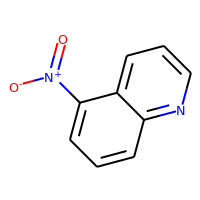
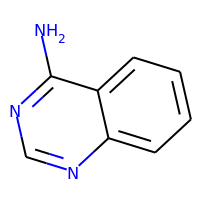
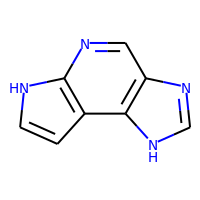
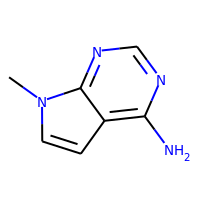
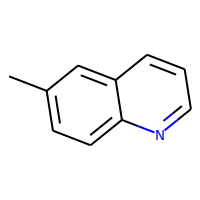

In [21]:
most_common_fragments_reduced.head()

Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib-dev/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


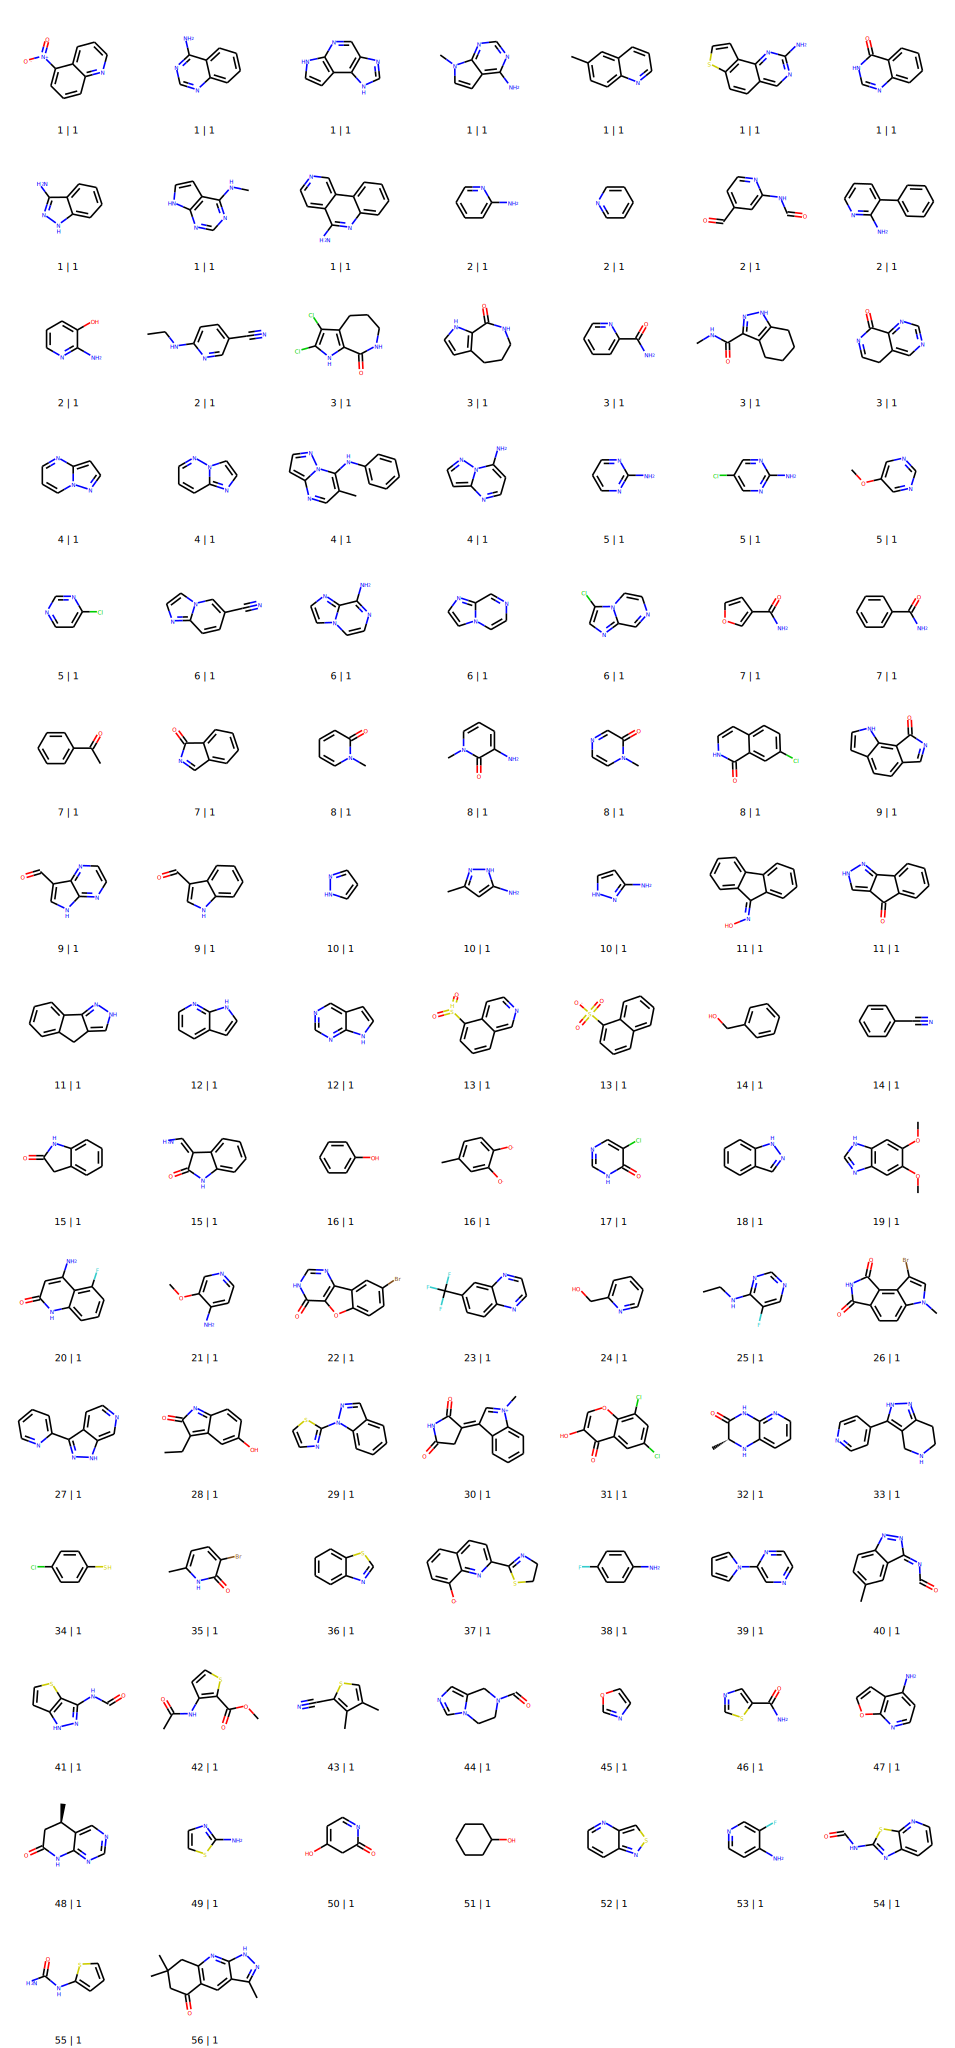

In [22]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_reduced, subpocket, None)

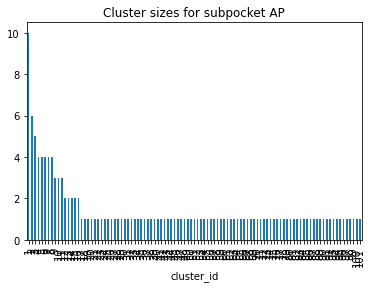

In [23]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_reduced, subpocket)

### 3.3. Fragment library custom filtered

## 4. Connection frequecy between subpockets
* 4.1. Fragment library pre-filtered
* 4.2. Fragment library reduced
* 4.3. Fragment library custom filtered

Todo: combine tables into one table for better overview!

### 4.1. Fragment library pre-filtered

In [24]:
fragment_library_concat = pd.concat(fragment_library)
connections_by_fragment = utils.get_connections_by_fragment(fragment_library_concat)
print(connections_by_fragment.shape)

(2009, 7)


In [25]:
connections_by_fragment[connections_by_fragment.complex_pdb == '5ew9']

,,kinase,complex_pdb,ligand_pdb,atom_subpockets,connections,connections_name,subpocket
AP,48,AurA,5ew9,5VC,AP AP AP AP AP AP AP AP AP SE,[SE],[AP=SE],AP
SE,54,AurA,5ew9,5VC,SE SE SE FP,[FP],[FP=SE],SE


In [26]:
connections_by_ligand = connections_by_fragment.groupby(
    ['kinase', 'complex_pdb', 'ligand_pdb']
)['connections_name'].sum()
connections_by_ligand_count = connections_by_ligand.apply(lambda x: Counter(x))
connections_by_ligand

kinase  complex_pdb  ligand_pdb
AAK1    5l4q         LKB                         [AP=FP, AP=SE, AP=FP, AP=SE]
        5te0         XIN                   [AP=SE, AP=GA, SE=X, AP=SE, AP=GA]
ABL1    2f4j         VX6           [AP=SE, FP=GA, FP=SE, AP=SE, FP=SE, FP=GA]
        2gqg         1N1                                [AP=GA, AP=SE, AP=GA]
        2v7a         627                                       [AP=FP, AP=SE]
                                                      ...                    
p38d    5eko         N17                                              [B2=GA]
p70S6K  3we4         5FI                                 [AP=FP, AP=FP, FP=X]
        3wf5         FZ8                                              [AP=FP]
        3wf6         FZ9                                              [AP=FP]
        3wf7         FS9                                       [AP=FP, FP=GA]
Name: connections_name, Length: 1437, dtype: object

In [27]:
# Get connection count across ligands (count each connection per ligand only once)
connections_across_ligands_count = pd.Series(Counter(connections_by_ligand_count.apply(list).sum()))
connections_across_ligands_count.name = 'count'

# Get connection frequency (100% = all ligands)
connections_across_ligands_frequency = connections_across_ligands_count.apply(lambda x: round((x / connections_by_ligand_count.shape[0] * 100), 1))
connections_across_ligands_frequency.name = 'frequency'

# Concatenate count and frequency data to DataFrame
connections_across_ligands = pd.concat([connections_across_ligands_count, connections_across_ligands_frequency], axis=1)
connections_across_ligands.sort_values(by='count', ascending=False)
# NBVAL_CHECK_OUTPUT

,count,frequency
AP=FP,726,50.5
AP=SE,626,43.6
AP=GA,366,25.5
FP=GA,117,8.1
FP=SE,108,7.5
SE=X,53,3.7
B1=GA,51,3.5
B2=GA,46,3.2
FP=X,40,2.8
B1=B2,9,0.6


### 4.2. Fragment library reduced

In [28]:
fragment_library_reduced_concat = pd.concat(fragment_library_reduced)
connections_by_fragment_reduced = utils.get_connections_by_fragment(fragment_library_reduced_concat)
print(connections_by_fragment_reduced.shape)

(624, 7)


In [29]:
connections_by_fragment_reduced[connections_by_fragment_reduced.complex_pdb == '5ew9']

,,kinase,complex_pdb,ligand_pdb,atom_subpockets,connections,connections_name,subpocket
AP,36,AurA,5ew9,5VC,AP AP AP AP AP AP AP AP AP SE,[SE],[AP=SE],AP
SE,69,AurA,5ew9,5VC,SE SE SE FP,[FP],[FP=SE],SE


In [30]:
connections_by_ligand_reduced = connections_by_fragment_reduced.groupby(
    ['kinase', 'complex_pdb', 'ligand_pdb']
)['connections_name'].sum()
connections_by_ligand_count_reduced = connections_by_ligand_reduced.apply(lambda x: Counter(x))
connections_by_ligand_reduced

kinase  complex_pdb  ligand_pdb
AAK1    5te0         XIN                                       [AP=GA]
ABL1    2f4j         VX6           [AP=SE, FP=GA, FP=SE, AP=SE, FP=SE]
        2gqg         1N1                                       [AP=GA]
        2v7a         627                                [AP=FP, AP=SE]
        4twp         AXI                                       [AP=FP]
                                                  ...                 
p38a    5xyx         FTZ                                [AP=GA, AP=GA]
p38d    4eym         0RX                                       [B2=GA]
        5eko         N17                                       [B2=GA]
p70S6K  3we4         5FI                                 [AP=FP, FP=X]
        3wf6         FZ9                                       [AP=FP]
Name: connections_name, Length: 542, dtype: object

In [31]:
# Get connection count across ligands (count each connection per ligand only once)
connections_across_ligands_count_reduced = pd.Series(Counter(connections_by_ligand_count_reduced.apply(list).sum()))
connections_across_ligands_count_reduced.name = 'count'

# Get connection frequency (100% = all ligands)
connections_across_ligands_frequency_reduced = connections_across_ligands_count_reduced.apply(lambda x: round((x / connections_by_ligand_count.shape[0] * 100), 1))
connections_across_ligands_frequency_reduced.name = 'frequency'

# Concatenate count and frequency data to DataFrame
connections_across_ligands_reduced = pd.concat([connections_across_ligands_count_reduced, connections_across_ligands_frequency_reduced], axis=1)
connections_across_ligands_reduced.sort_values(by='count', ascending=False)
# NBVAL_CHECK_OUTPUT

,count,frequency
AP=FP,254,17.7
AP=SE,193,13.4
AP=GA,120,8.4
FP=GA,41,2.9
B1=GA,32,2.2
FP=SE,29,2.0
B2=GA,29,2.0
SE=X,13,0.9
FP=X,11,0.8
B1=B2,8,0.6


### 4.3. Fragment library custom filtered

## 5. Fragment similarity per subpocket


ToDo: put tables and plots together for better comparison

In [32]:
similarities_per_subpocket = utils.get_fragment_similarity_per_subpocket(fragment_library_concat)
similarities_per_subpocket.head()

,similarity,subpocket
0,0.104987,AP
1,0.108247,AP
2,0.059072,AP
3,0.170306,AP
4,0.077844,AP


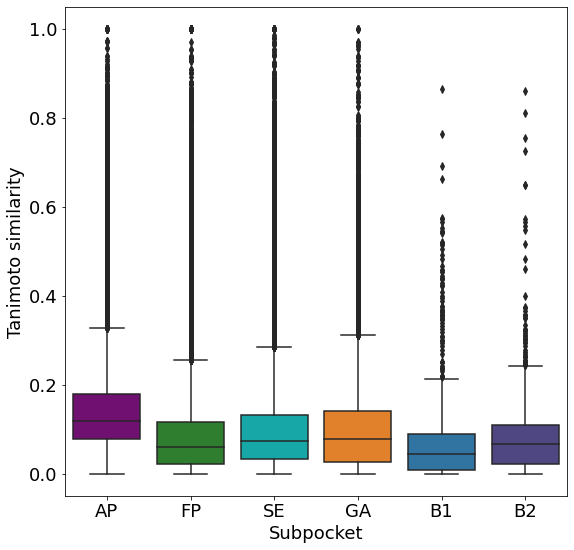

In [33]:
filters.pipeline_analysis.plot_fragment_similarity(similarities_per_subpocket, 'Subpocket')

In [34]:
similarities_per_subpocket.groupby('subpocket', sort=False).mean()

,similarity
subpocket,
AP,0.142863
FP,0.087709
SE,0.103248
GA,0.108116
B1,0.080436
B2,0.088053


#### reduced library

In [35]:
similarities_per_subpocket_reduced = utils.get_fragment_similarity_per_subpocket(fragment_library_reduced_concat)
similarities_per_subpocket_reduced.head()

,similarity,subpocket
0,0.741935,AP
1,0.642276,AP
2,0.360544,AP
3,0.364964,AP
4,0.400000,AP


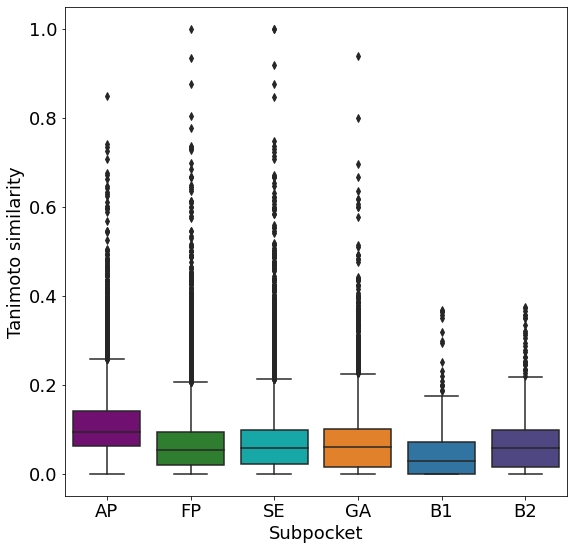

In [36]:
filters.pipeline_analysis.plot_fragment_similarity(similarities_per_subpocket_reduced, 'Subpocket')

In [37]:
similarities_per_subpocket_reduced.groupby('subpocket', sort=False).mean()

,similarity
subpocket,
AP,0.111311
FP,0.069282
SE,0.076425
GA,0.075186
B1,0.052510
B2,0.073320


## 6. Fragment properties 
* 6.1. per subpocket for each set
* 6.2. per custom filter

1. one for each filter step
2. one for custom filtered library

### 6.1. per subpocket for each set 

#### prefiltered fragment library

In [38]:
descriptors = utils.get_descriptors_by_fragments(fragment_library)

In [39]:
descriptors.groupby('subpocket').median()

,# HBD,# HBA,LogP,# Heavy atoms
subpocket,,,,
AP,1.0,2.0,1.3946,11.0
B1,1.0,1.0,1.1785,8.0
B2,0.0,1.0,1.2742,8.5
FP,1.0,2.0,0.7772,9.0
GA,1.0,1.0,1.4121,9.0
SE,1.0,2.0,1.0787,10.0


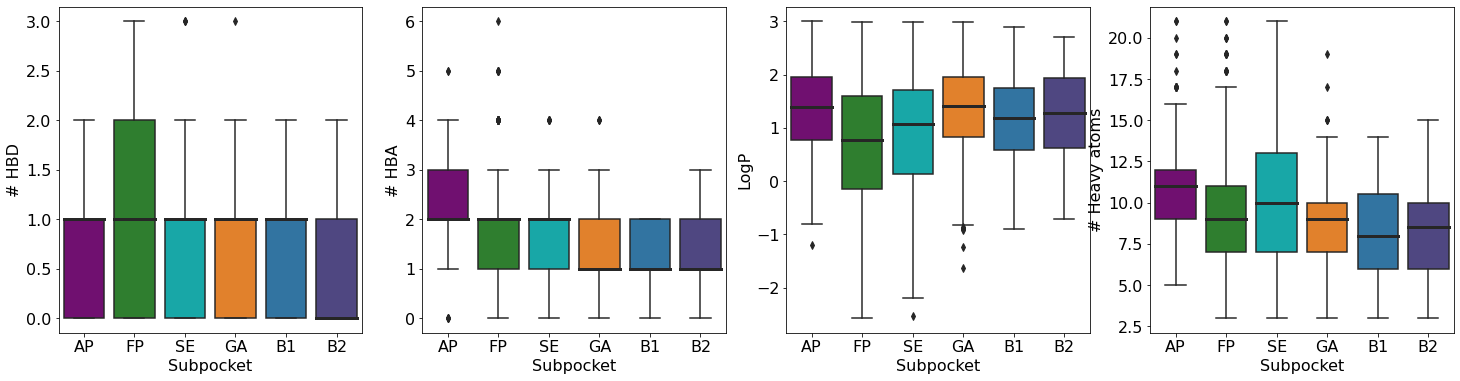

In [40]:
filters.pipeline_analysis.plot_fragment_descriptors(descriptors)

#### reduced fragment library

In [41]:
descriptors_reduced = utils.get_descriptors_by_fragments(fragment_library_reduced)

In [42]:
descriptors_reduced.groupby('subpocket').median()

,# HBD,# HBA,LogP,# Heavy atoms
subpocket,,,,
AP,1.0,3.0,1.19270,10.0
B1,0.0,1.0,1.15670,7.0
B2,0.0,1.0,1.31735,8.0
FP,1.0,2.0,1.03165,9.0
GA,1.0,2.0,1.18690,8.0
SE,0.5,2.0,1.17985,10.0


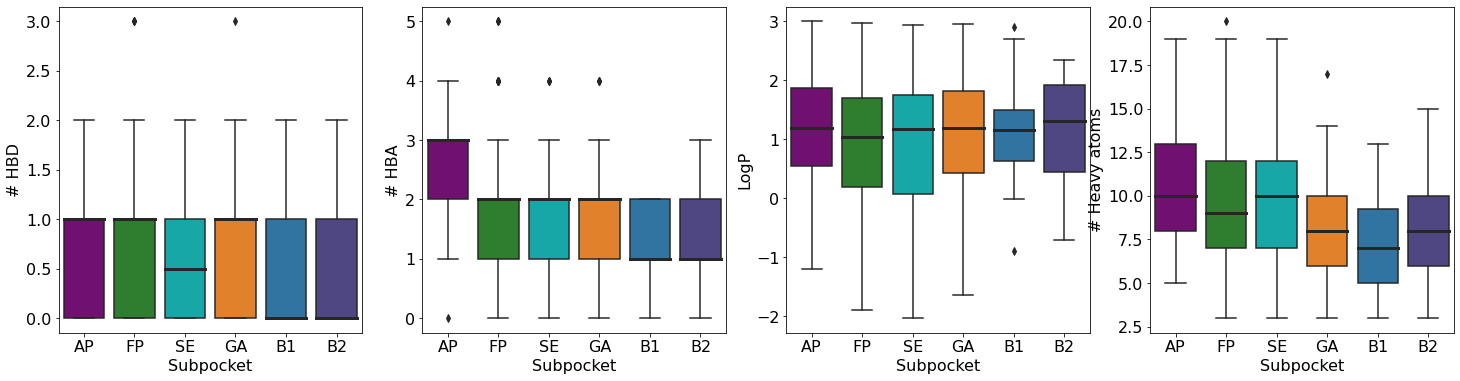

In [43]:
filters.pipeline_analysis.plot_fragment_descriptors(descriptors_reduced)

### 6.2. per custom filter

## 7. Development of number of fragments per subpocket during custom filtering

Inspect the number of fragments filtered out by each custom filtering step